In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn
import pandas as pd
import seaborn as sns
#from sklearn.model_selection import train_test_split
import random

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:
#we begin by importing the dataset

data=pd.read_csv("/Users/maloevain/Desktop/Cours S6/IAS/EVAIN_MALO_GOUMAIN_BAPTISTE/Placement_Data_Full_Class.csv")
data.head()



,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# columns name :
1.sl_no : Serial Number,

2.ssc_p : Secondary Education percentage- 10th Grade

3.ssc_b : Board of Education- Central/ Others

4.hsc_p : Higher Secondary Education percentage- 12th Grade

5.hsc_b : Board of Education- Central/ Others

6.hsc_s : Specialization in Higher Secondary Education

7.degree_p : Degree Percentage

8.degree_t : Under Graduation(Degree type)- Field of degree education

9.workex : Work Experience

10.etest_p : Employability test percentage ( conducted by college)

11.specialisation : Post Graduation(MBA)- Specialization

12.mba_p : MBA percentage

13.status : Status of placement- Placed/Not placed


In [16]:
data.shape

(215, 15)


The first thing to note is that there are only 215 values. This will impact the model's performance.
However, our goal will be to propose methods for analyzing, processing, and predicting data that will be functional
regardless of the data set's size. So, beyond the performance issue, the fact that the data set has only 215 values
will not be a problem because everything we are going to do will generalize to larger data sets.

In [17]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


### Objective

The objective of our project will be to predict whether a student will be placed in a company or not based on various criteria.

This is a problem of supervised classification (binary in our case as there are only two possible outcomes).

We will separate, on one hand, the student's characteristics into a vector X, and on the other hand, 
the prediction values (whether they have been placed or not) into a vector y.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


 First, we notice that not all values are numbers. Therefore, we will need to perform various operations on the 
data set to produce a new data set that can be used for our algorithms. For gender, ssc_b, hsc_b, hsc_p, 
degree, workex, specialisation, and status, since they are categorical features, we will encode them as one-hot vectors.'''

''' Next, we can see that there is missing data for the salary values. Either we will try to effectively fill in 
this gap (for example, by exploring if we can predict the salary using other values), or we may consider removing 
this column if it doesn't significantly affect the predictions.

In [19]:
data.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

The frequencies of placed and non-placed instances are not too low or too high relative to each other. Therefore, there will probably be no need to weight each class. Later on, we can still assess whether the result is better when weighted.

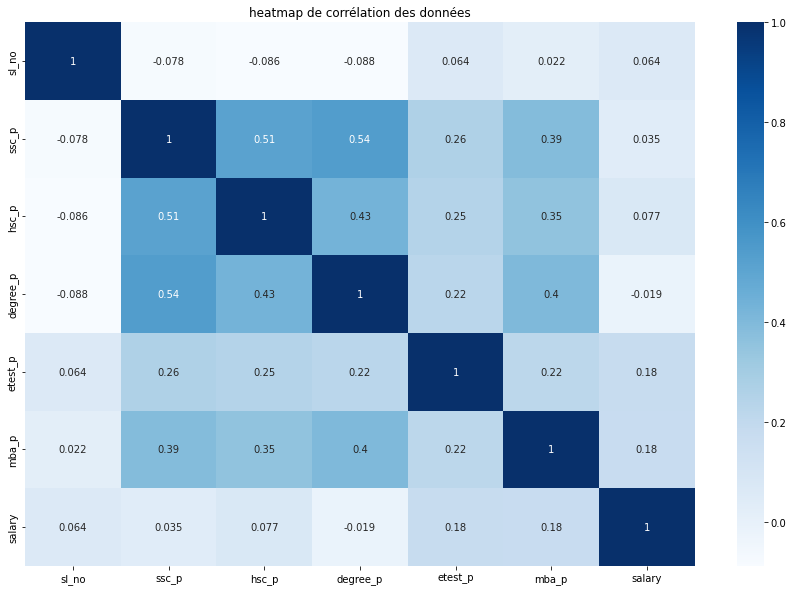

In [20]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(data.corr(), annot = True, cmap = 'Blues')
ax.title.set_text("heatmap de corrélation des données")


We notice that certain data points are somewhat correlated, which could possibly lead us to perform PCA. However, since we only have 14 columns, it may not be necessary here, but it could be interesting if we wish to add more features later on.

Any classification algorithm could work, but we are more inclined to lean towards a perceptron (as we have studied it in class and its implementation seems within reach) or a decision tree-based algorithm (as they are highly effective for classification problems).

In [21]:
''' We are starting to format the dataset to prepare for further work.'''
tab1=pd.unique(data['hsc_s'])
for i in tab1:
    data[i] = ((data[['hsc_s']] == i).values).astype(int)


tab2=pd.unique(data['ssc_b'])
for i in tab2:
    data[i] = ((data[['ssc_b']] == i).values).astype(int)

tab3=pd.unique(data['gender'])
for i in tab3:
    data[i] = ((data[['gender']] == i).values).astype(int)

tab4=pd.unique(data['ssc_b'])
for i in tab4:
    data[i] = ((data[['ssc_b']] == i).values).astype(int)

tab5=pd.unique(data['hsc_b'])
for i in tab4:
    data[i] = ((data[['hsc_b']] == i).values).astype(int)

tab6=pd.unique(data['degree_t'])
for i in tab6:
    data[i] = ((data[['degree_t']] == i).values).astype(int)

tab7=pd.unique(data['workex'])
for i in tab7:
    data[i] = ((data[['workex']] == i).values).astype(int)

    
tab8=pd.unique(data['specialisation'])
for i in tab8:
    data[i] = ((data[['specialisation']] == i).values).astype(int)

tab9=pd.unique(data['status'])
for i in tab9:
    data[i] = ((data[['status']] == i).values).astype(int)




In [22]:
data.drop(['sl_no','gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status'],inplace=True,axis=1)


We drop the columns which do not give further informations. For example if someone is not a male he is a female so we do not need to keep the female column, only the male's one gives informations.

It reduces significantly the size of the dataset.

In [23]:
'''We are removing related columns, especially for binary ones.'''

data.drop(['No','Arts','Central','F','Comm&Mgmt','Mkt&Fin','Not Placed','salary'],axis=1,inplace=True)



In [24]:
data.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,Commerce,Science,Others,M,Sci&Tech,Yes,Mkt&HR,Placed
0,67.00,91.00,58.00,55.0,58.80,1,0,0,1,1,0,1,1
1,79.33,78.33,77.48,86.5,66.28,0,1,0,1,1,1,0,1
2,65.00,68.00,64.00,75.0,57.80,0,0,0,1,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,0,1,0,1,1,0,1,0
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,0,0,1


In [9]:
''' we split the dataset'''
y=data["Placed"]
X=data.drop('Placed',1)
for i in range(len(y)):
    if y[i]==0:
        y[i]=-1
X=X.assign(biais=1)
X

/var/folders/35/ndlr0g2n07x616r3b0hz4v4c0000gn/T/ipykernel_5638/3932084280.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=data.drop('Placed',1)
/var/folders/35/ndlr0g2n07x616r3b0hz4v4c0000gn/T/ipykernel_5638/3932084280.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i]=-1


,ssc_p,hsc_p,degree_p,etest_p,mba_p,Commerce,Science,Others,M,Sci&Tech,Yes,Mkt&HR,biais
0,67.00,91.00,58.00,55.0,58.80,1,0,0,1,1,0,1,1
1,79.33,78.33,77.48,86.5,66.28,0,1,0,1,1,1,0,1
2,65.00,68.00,64.00,75.0,57.80,0,0,0,1,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,0,1,0,1,1,0,1,1
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,1,0,0,1,0,0,0,1
211,58.00,60.00,72.00,74.0,53.62,0,1,0,1,1,0,0,1
212,67.00,67.00,73.00,59.0,69.72,1,0,0,1,0,1,0,1
213,74.00,66.00,58.00,70.0,60.23,1,0,0,0,0,0,1,1


In [7]:
''' We are going to implement the perceptron.'''

def perceptron(X,w):
    A=np.dot(X,w.T)
    for i in range(len(A)):
        if A[i]>0:
            A[i]=1
        else :
            A[i]=-1
    return A


In [8]:
''' We define the cost function'''
def produit_matrice(A,B):
    T=[]
    for i in range(len(A)):
        T.append(A[i]*B[i])
    return np.array(T)

#be careful here, 'w' and 'y' need to be numpy arrays rather than column vectors.
def cost_function(X,w,y):    
    A=np.dot(X,w.T)
    produit=produit_matrice(A,y)
    s=0
    for i in range(len(produit)):
        s=s+max(0,-produit[i])
    return s/len(produit)





In [9]:
'''We implement the gradient descent'''
def descente_gradient(w,eta,X,y,nb_itération=150):
    T=[]
    for k in range(nb_itération):
        p=perceptron(X,w)
        for j in range(len(w)):
            s=0
            for i in range(len(X)):
                if p[i]-y[i]!=0:
                    s=s+p[i]*X[i][j]
            w[j]=w[j]-eta*s/len(X)
        T.append(cost_function(X,w,y))
    plt.plot(T,label=f'cost pour eta = {eta} et it={nb_itération}')
    plt.xlabel("nb_iterations")
    plt.ylabel("côut")
    plt.legend()
    return w



In [10]:
''' We are splitting our data into two sets: one for training the model and another for verifying our results. '''

X_train= X.iloc[50:,:]
X_test=X.iloc[:50:,:]
y_train=y.iloc[50:]
y_test = y.iloc[:50]
print(X_train)

     ssc_p  hsc_p  degree_p  etest_p  mba_p  Commerce  Science  Others  M  \
50   75.20  73.20      68.4     65.0  62.98         0        1       0  0   
51   54.40  61.12      56.2     67.0  62.65         1        0       0  1   
52   40.89  45.83      53.0     71.2  65.49         1        0       0  0   
53   80.00  70.00      72.0     87.0  71.04         0        1       0  1   
54   74.00  60.00      69.0     78.0  65.56         0        1       0  0   
..     ...    ...       ...      ...    ...       ...      ...     ... ..   
210  80.60  82.00      77.6     91.0  74.49         1        0       0  1   
211  58.00  60.00      72.0     74.0  53.62         0        1       0  1   
212  67.00  67.00      73.0     59.0  69.72         1        0       0  1   
213  74.00  66.00      58.0     70.0  60.23         1        0       0  0   
214  62.00  58.00      53.0     89.0  60.22         0        1       0  1   

     Sci&Tech  Yes  Mkt&HR  biais  
50          0    0       1      1  
51 

In [11]:
"""At the beginning, the value of 'w' is unknown, so we choose a random value. It's important that the initial values
chosen are floats; otherwise, the algorithm operates with integers and rounds the values."""

w=np.array([12.22 for i in range(13)])
print(w)


[12.22 12.22 12.22 12.22 12.22 12.22 12.22 12.22 12.22 12.22 12.22 12.22
 12.22]


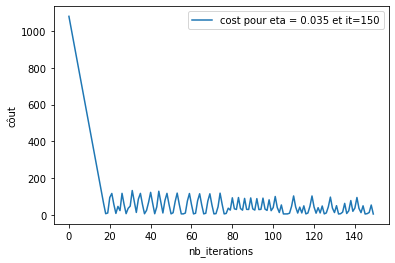

In [12]:
"We train the model and display the evolution of the error during training using the cost function."
w=descente_gradient(w,0.035,np.array(X_train),np.array(y_train))

In [13]:
"Finally, we evaluate the model's accuracy to determine its performance."
def accuracy(w,X_t,y_t):
    s=0
    res = perceptron(X_t,w)
    for i in range(len(res)):
        if res[i]==y_t[i]:
            s=s+1
    return 100*s/len(y_t)
print(accuracy(w,np.array(X_test),np.array(y_test)))
print(accuracy(w,np.array(X_train),np.array(y_train)))



"The difference between the prediction on the training set and the test set indicates that there is some overfitting."

78.0
85.45454545454545


"La différence entre la prediction sur le train set et le test set nous montre qu'il y a un peu d'overfitting"

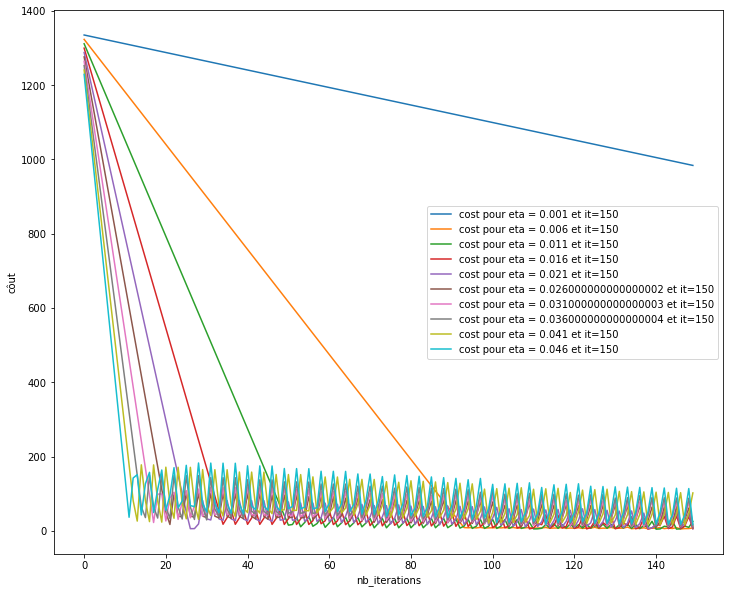

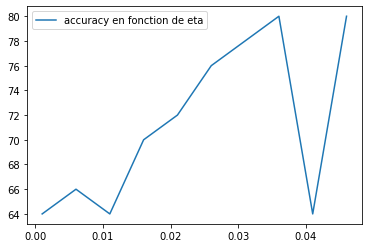

In [15]:
def hyperparam_eta(X,y):
    plt.figure(figsize=(12,10))
    eta=0.001
    acc=[]
    eta_tab=[]
    w1=np.array([12.2 for i in range(13)])
    while eta<=0.05:
        eta_tab.append(eta)
        w=np.copy(w1)
        w=descente_gradient(w,eta,X,y,150)
        eta=eta+0.005
        acc.append(accuracy(w,np.array(X),np.array(y)))
    plt.show()
    plt.figure()
    plt.plot(eta_tab,acc,label='accuracy en fonction de eta')
    plt.legend()
    
hyperparam_eta(np.array(X_test),np.array(y_test))


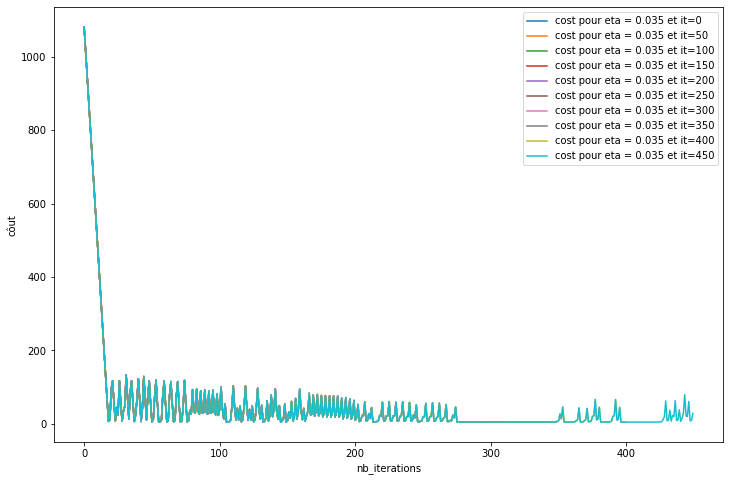

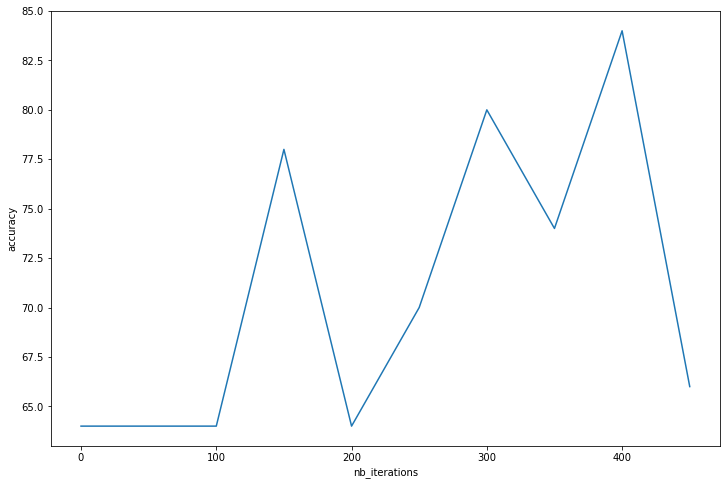

In [15]:
"Now, we are going to see what happens when we increase the number of iterations for our gradient descent algorithm."
w2=np.array([12.22 for i in range(13)])
plt.figure(figsize=(12,8))
acc=[]
it=[]
for i in range(10):
    w3=np.copy(w2)
    w3=descente_gradient(w3,0.035,np.array(X_train),np.array(y_train),i*50)
    acc.append(accuracy(w3,np.array(X_test),np.array(y_test)))
    it.append(i*50)
plt.figure(figsize=(12,8))
plt.xlabel("nb_iterations")
plt.ylabel("accuracy")
plt.plot(it,acc)
plt.show()

Now, we will attempt to improve the accuracy by removing certain binary columns and keeping only those that we consider the most important.
We are assessing the relative importance of binary values because, since we are using a perceptron, if we can eliminate some binary values, it would be advantageous for us.

In [16]:

def compte_nb_placed(dataset,nom_colonne):
    "This function provides us with the number of people placed based on whether the value in the column is 1 or 0."
    nb_placed_1=0
    nb_placed_0=0
    nb_not_placed_1=0
    nb_not_placed_0=0
    for i in range(len(dataset)):
        if dataset[nom_colonne][i]==1:
            if dataset['Placed'][i]==1:
                nb_placed_1 += 1
            else:
                nb_not_placed_1+=1
        else :
            if dataset['Placed'][i]==1:
                nb_placed_0 += 1
            else:
                nb_not_placed_0+=1
    print(nom_colonne)
    print("nb_placed_1 = " , nb_placed_1)
    print("nb_not_placed_1 = ", nb_not_placed_1)

    print("nb_placed_0 = ", nb_placed_0)
    print("nb_not_placed_0 = ", nb_not_placed_0)
    print('')
    return nb_placed_1,nb_placed_0

a,b=compte_nb_placed(data,'Commerce')

a,b=compte_nb_placed(data,'Science')

a,b=compte_nb_placed(data,'Others')

a,b=compte_nb_placed(data,'M')

a,b=compte_nb_placed(data,'Sci&Tech')

a,b=compte_nb_placed(data,'Yes')
"A crucial criterion, as we can clearly see that if the student has a '1' in the 'Yes' column, they have a high likelihood of being placed."

a,b=compte_nb_placed(data,'Mkt&HR')
"This column is also important because we can see that '0' often implies that the student has been placed."

Commerce
nb_placed_1 =  79
nb_not_placed_1 =  34
nb_placed_0 =  69
nb_not_placed_0 =  33

Science
nb_placed_1 =  63
nb_not_placed_1 =  28
nb_placed_0 =  85
nb_not_placed_0 =  39

Others
nb_placed_1 =  5
nb_not_placed_1 =  6
nb_placed_0 =  143
nb_not_placed_0 =  61

M
nb_placed_1 =  100
nb_not_placed_1 =  39
nb_placed_0 =  48
nb_not_placed_0 =  28

Sci&Tech
nb_placed_1 =  41
nb_not_placed_1 =  18
nb_placed_0 =  107
nb_not_placed_0 =  49

Yes
nb_placed_1 =  64
nb_not_placed_1 =  10
nb_placed_0 =  84
nb_not_placed_0 =  57

Mkt&HR
nb_placed_1 =  53
nb_not_placed_1 =  42
nb_placed_0 =  95
nb_not_placed_0 =  25



'colonne aussi importante car on voit que 0 implique souvent que letudiant a été placé'

In [21]:
X_train_2=X_train.copy()
X_train_2.drop(['Commerce','Science'],axis=1,inplace=True)

print(X_train_2)
X_test_2=X_test.copy()
X_test_2.drop(['Commerce','Science'],axis=1,inplace=True)


     ssc_p  hsc_p  degree_p  etest_p  mba_p  Others  M  Sci&Tech  Yes  Mkt&HR  \
50   75.20  73.20      68.4     65.0  62.98       0  0         0    0       1   
51   54.40  61.12      56.2     67.0  62.65       0  1         0    0       1   
52   40.89  45.83      53.0     71.2  65.49       0  0         0    0       1   
53   80.00  70.00      72.0     87.0  71.04       0  1         1    0       1   
54   74.00  60.00      69.0     78.0  65.56       0  0         0    0       1   
..     ...    ...       ...      ...    ...     ... ..       ...  ...     ...   
210  80.60  82.00      77.6     91.0  74.49       0  1         0    0       0   
211  58.00  60.00      72.0     74.0  53.62       0  1         1    0       0   
212  67.00  67.00      73.0     59.0  69.72       0  1         0    1       0   
213  74.00  66.00      58.0     70.0  60.23       0  0         0    0       1   
214  62.00  58.00      53.0     89.0  60.22       0  1         0    0       1   

     biais  
50       1  
5

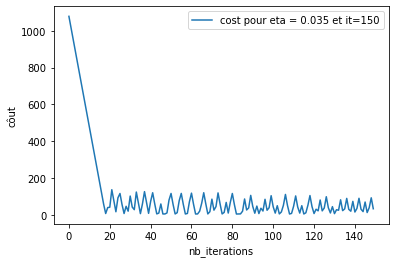

In [22]:
"""We are taking the same initial values for 'w2' as we did for 'w' (minus 2 values because it has two fewer 
dimensions) from the dataset with all the columns."""

w2=np.array([12.22 for i in range(11)])
w2=descente_gradient(w2,0.035,np.array(X_train_2),np.array(y_train))


In [27]:
print(accuracy(w2,np.array(X_test_2),np.array(y_test)))


64.0


' On obtient un moins bon résultat aprés avoir supprimé ces deux colonnes'

We obtained a worse result after removing these two columns.

In [30]:
''' We will try to use another model : decisions trees'''

from sklearn import tree
model_2a = tree.DecisionTreeClassifier(criterion='entropy')
model_2a.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [31]:
model_2a.score(X_test,y_test)

0.84

In [32]:
model_2b=tree.DecisionTreeClassifier(criterion='gini')
model_2b.fit(X_train,y_train)
model_2b.score(X_test,y_test)

0.8

In [29]:
model_2a.score(X_train,y_train)
model_2b.score(X_train,y_train)

1.0

We also notice that the model overfits because it shows no prediction errors on the training set. At the same time, considering that we only have 160 data points, it's logical that after a few iterations, it manages to achieve pure leaves.

In [33]:
from sklearn.ensemble import RandomForestClassifier
model_3 = RandomForestClassifier()
model_3.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
model_3.score(X_test, y_test)

0.86

In [35]:
"Finally, the last model we are going to use is the Support Vector Machine."


from sklearn.svm import SVC
model_4 = SVC()
model_4.fit(X_train,y_train)
model_4.score(X_test,y_test)

0.82